In [1]:
import pandas as pd  #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #Linear algebra

# running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt #pyplot is a collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns #It is advance data visualization library
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sns.set_style('darkgrid') # It sets the style of the plots to have a dark background with gridlines.

## Load Dataset

In [3]:
df=pd.read_csv('milknew.csv') #df is name given to the dataset

## Basic EDA

In [4]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [8]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [9]:
#Print first 5 rows of dataset
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [10]:
#Print last 5 rows of dataset
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0
1058,8.6,55,0,1,1,1,255,1


In [11]:
df.shape # which presents columns and rows of the dataset

(1059, 8)

In [12]:
#the information contains the number of columns, column labels, column data types,
#memory usage, range index, and the number of cells in each column (non-null values)

df.info() #actually prints the info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 62.2 KB


In [13]:
df['Grade'].value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

### Basic Statistic details about the data
note only numerical columns would be displayed here unless parameter include="all"
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [14]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,1.111426
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.763568
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


## Data Cleaning

In [15]:
df.duplicated().sum()

976

In [16]:
#We can remove the duplicates values using dropna..
df.drop_duplicates()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,0
942,6.6,45,1,0,0,1,255,2
957,6.8,41,1,1,1,0,255,0
985,6.5,45,1,0,0,0,246,2


In [17]:
#Checking for null values which are present in dataset
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [18]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

### Value counts of Different Colums

In [19]:
df['Grade'].value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

In [20]:
df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [21]:
df['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [22]:
df['Grade'].value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

In [23]:
df['Temprature'].value_counts()

45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: Temprature, dtype: int64

In [24]:
#Correlation of columns between each other 
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,-0.012518
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.094232
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,-0.197629
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,-0.454609
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,-0.501070
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.428017
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.212994
Grade,-0.012518,-0.094232,-0.197629,-0.454609,-0.501070,-0.428017,-0.212994,1.000000


## Data Visualization

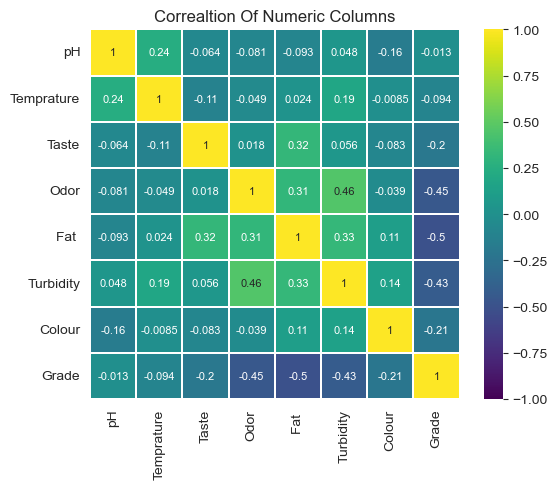

In [25]:
heatmap=sns.heatmap(
    df.corr(),           # Compute the correlation matrix of the DataFrame
    annot=True,          # Display the correlation values on the heatmap
    cmap='viridis',      # Set the color map for the heatmap (using the 'viridis' colormap)
    vmax=1.0,            # Set the maximum value of the color range to 1.0
    vmin=-1.0,           # Set the minimum value of the color range to -1.0
    linewidths=0.1,      # Set the width of the lines between cells in the heatmap
    annot_kws={"size": 8},  # Set the font size for the annotations on the heatmap
    square=True          # Force the heatmap cells to be square-shaped
)
heatmap.set_title('Correaltion Of Numeric Columns') #Set the title for heatmap
plt.show()

## Grade Distribution

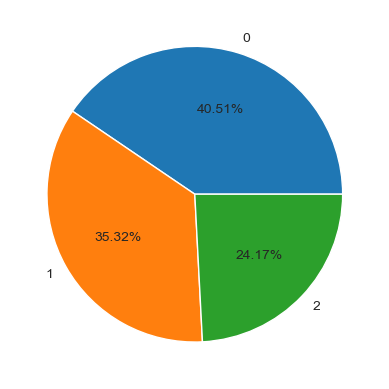

In [26]:
#Grade  distribution
plt.pie(df['Grade'].value_counts(),autopct='%1.2f%%',labels=np.unique(df['Grade']))
plt.show()

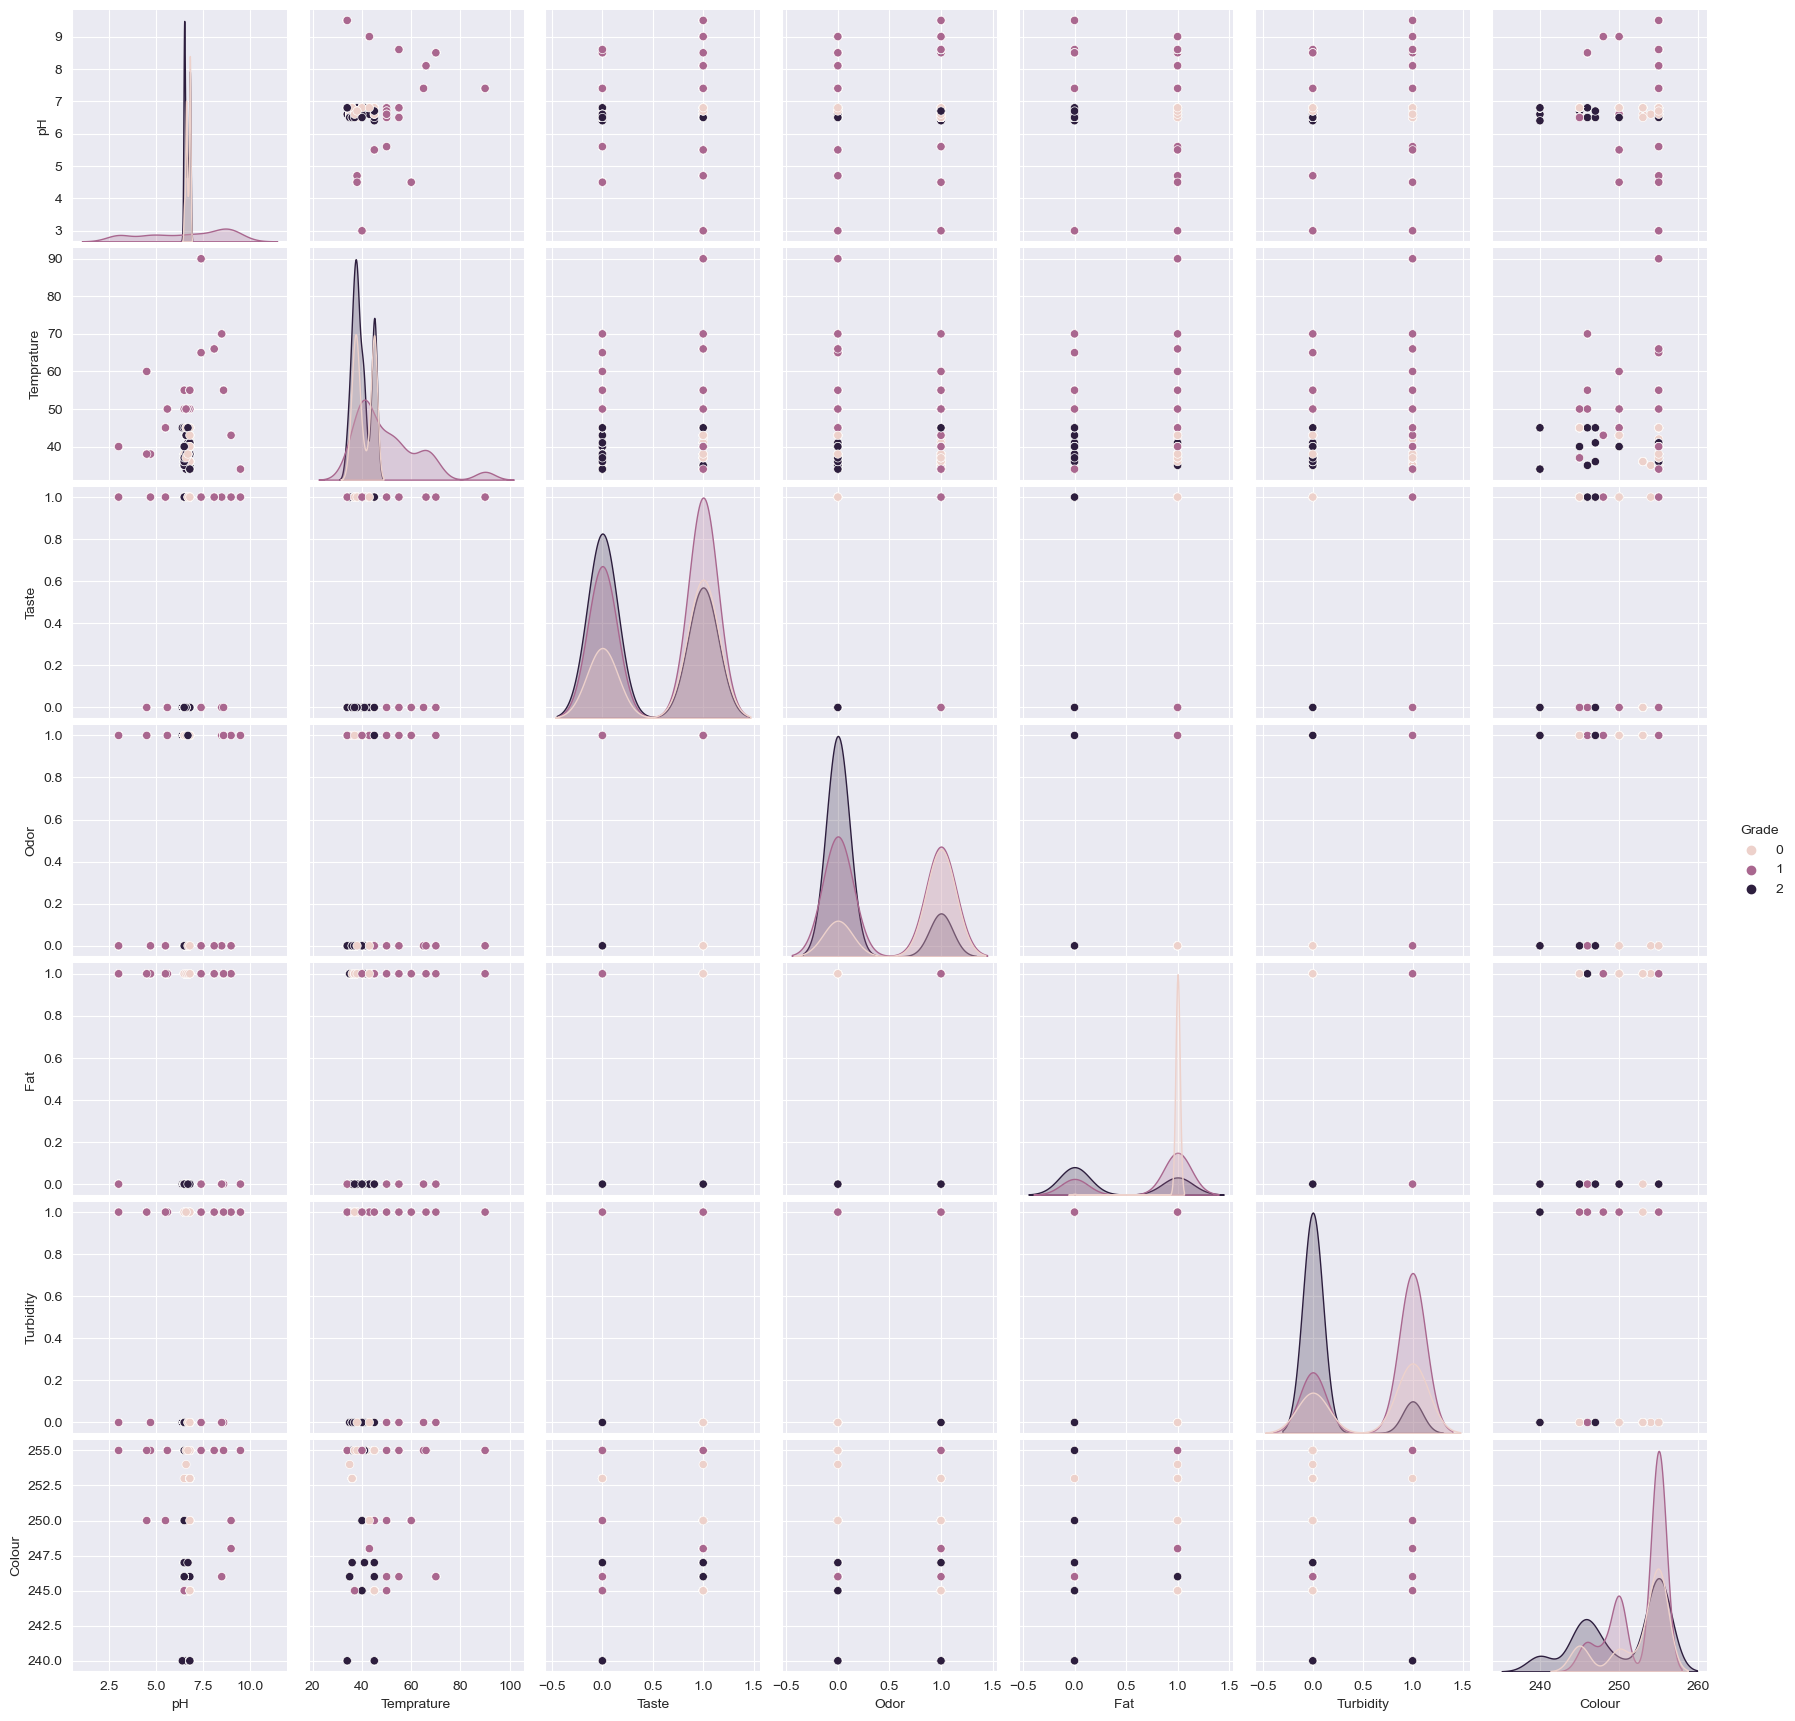

In [27]:
sns.pairplot(df,hue='Grade')

<AxesSubplot:xlabel='Grade', ylabel='Colour'>

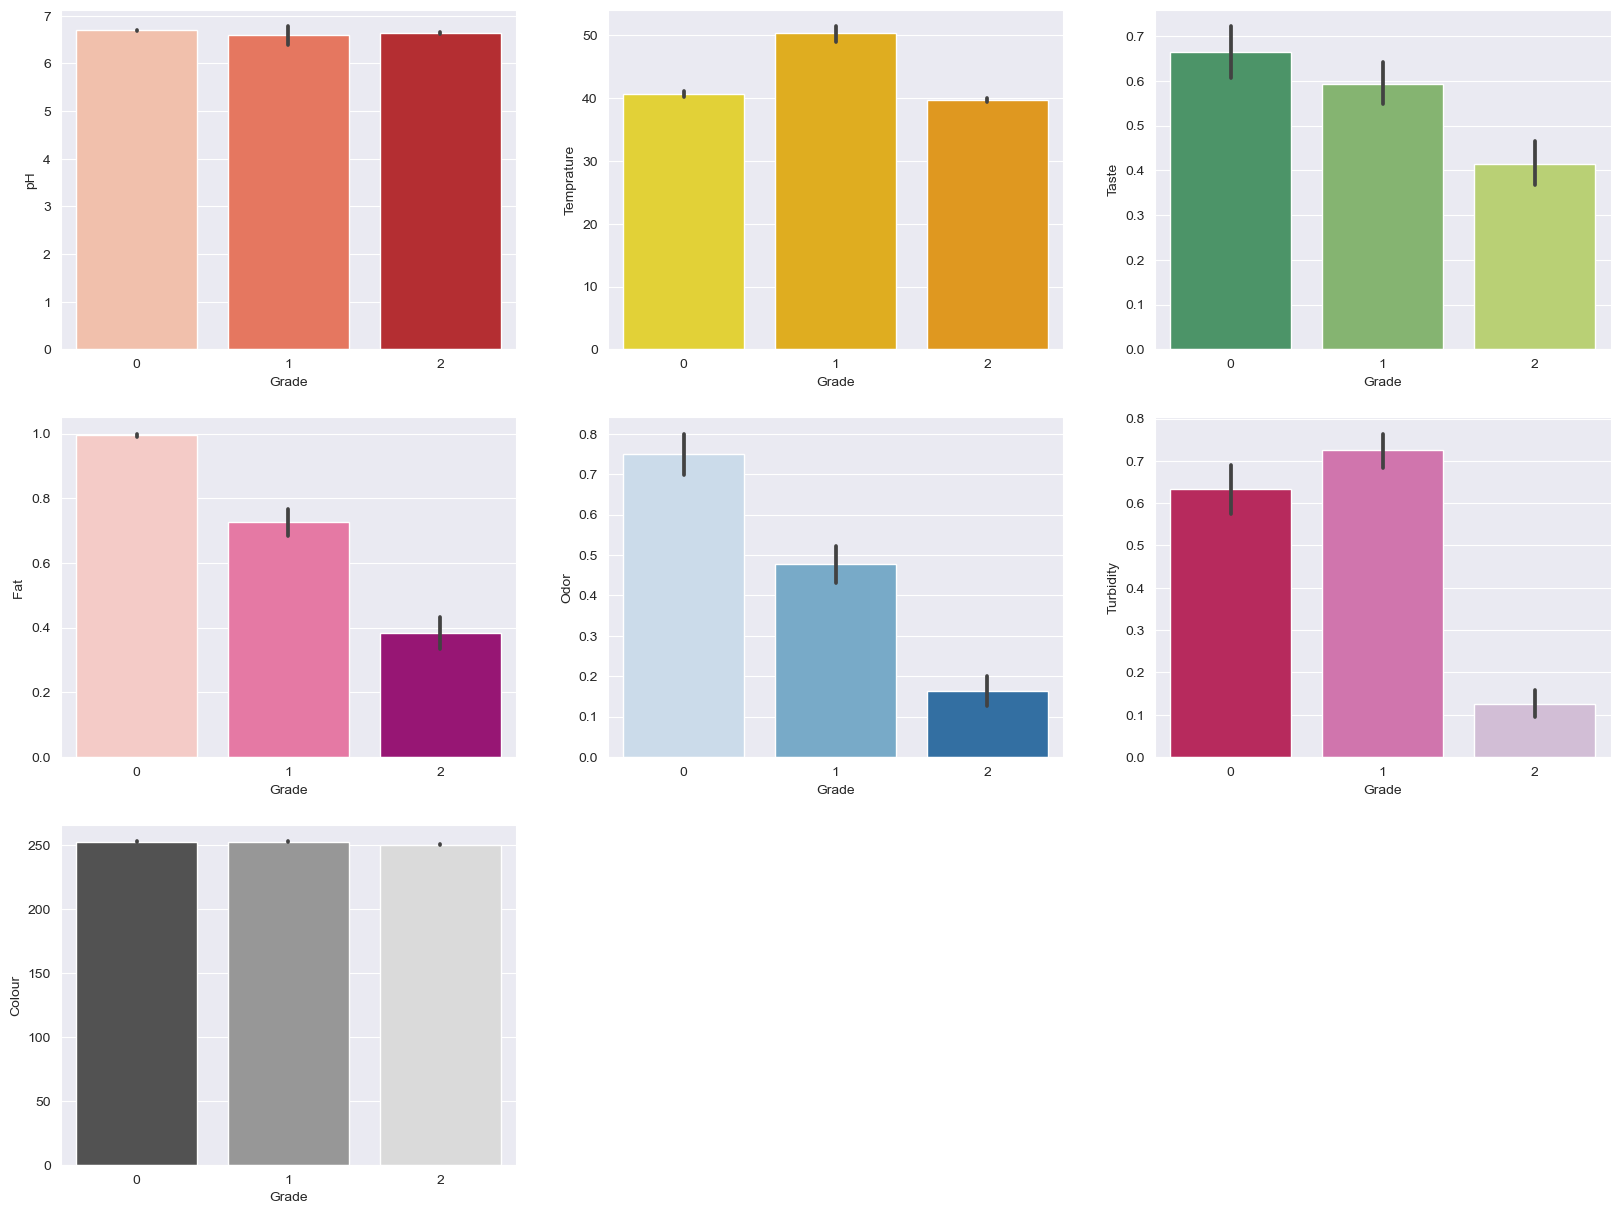

In [28]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.barplot(x = 'Grade', y = 'pH', data = df, palette="Reds")

plt.subplot(3,3,2)
sns.barplot(x = 'Grade', y = 'Temprature', data = df, palette="Wistia")

plt.subplot(3,3,3)
sns.barplot(x = 'Grade', y = 'Taste', data = df, palette="summer")

plt.subplot(3,3,5)
sns.barplot(x = 'Grade', y = 'Odor', data = df, palette="Blues")

plt.subplot(3,3,4)
sns.barplot(x = 'Grade', y = 'Fat ', data = df, palette="RdPu")

plt.subplot(3,3,6)
sns.barplot(x = 'Grade', y = 'Turbidity', data = df, palette="PuRd_r")

plt.subplot(3,3,7)
sns.barplot(x = 'Grade', y = 'Colour', data = df, palette="Greys_r")

### Odor v/s Grade using Boxplot

Text(0.5, 1.0, 'Odor v/s Grade')

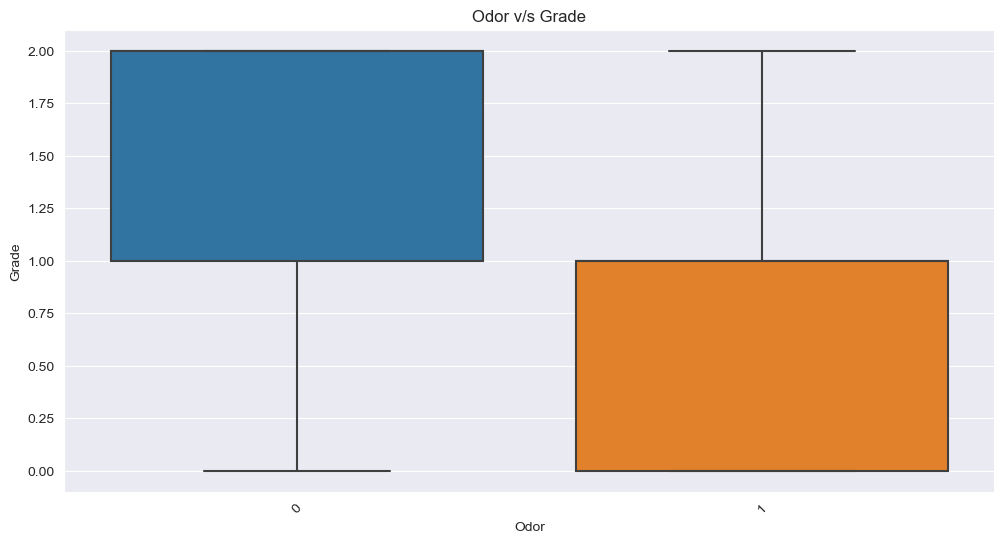

In [29]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(y='Grade', x='Odor', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Odor v/s Grade')

### Temprature v/s Grade using Lineplot

<AxesSubplot:xlabel='Temprature', ylabel='Grade'>

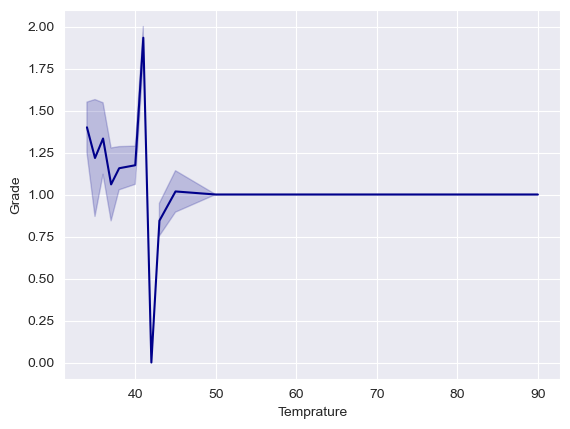

In [30]:
sns.lineplot(df['Temprature'],df['Grade'],color='darkblue')

### Turbidity v/s Grade using Swarmplot

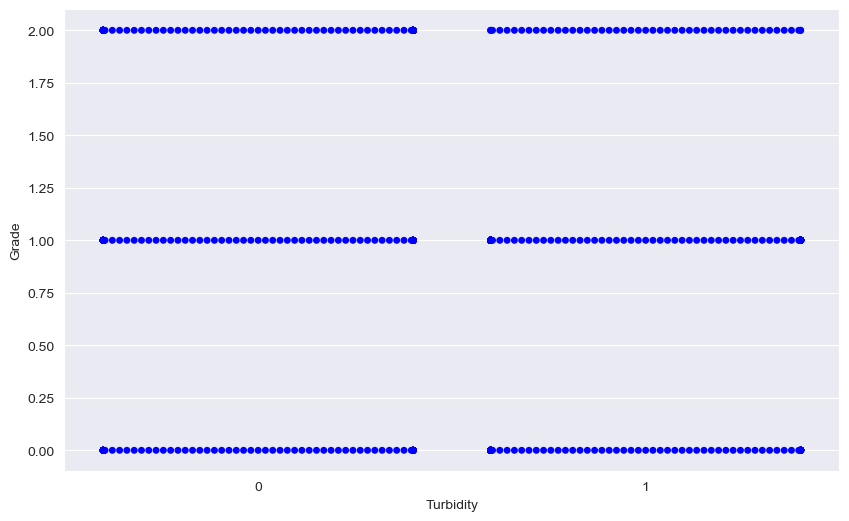

In [31]:
plt.figure(figsize=(10,6))
sns.swarmplot(df['Turbidity'],df['Grade'],color='blue')
plt.show()

### pH v/s Grade using Barplot

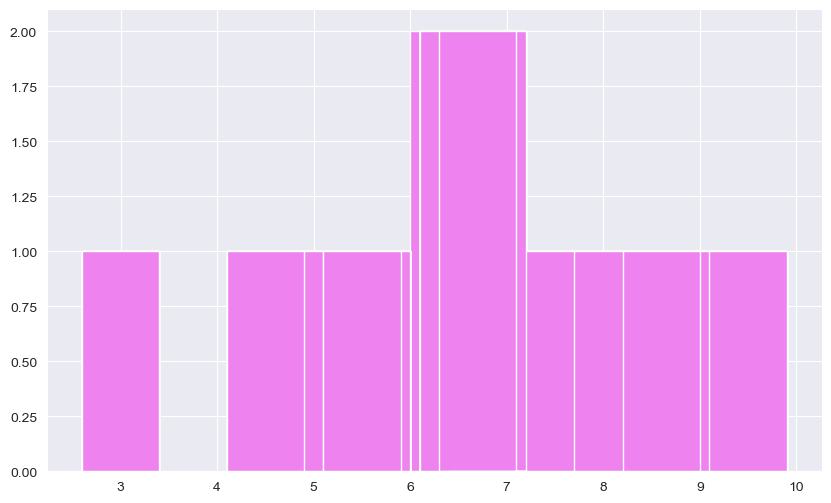

In [32]:
plt.figure(figsize=(10,6))
plt.bar(df['pH'],df['Grade'],color='violet')
plt.show()

### Taste v/s Grade using Scatterplot 

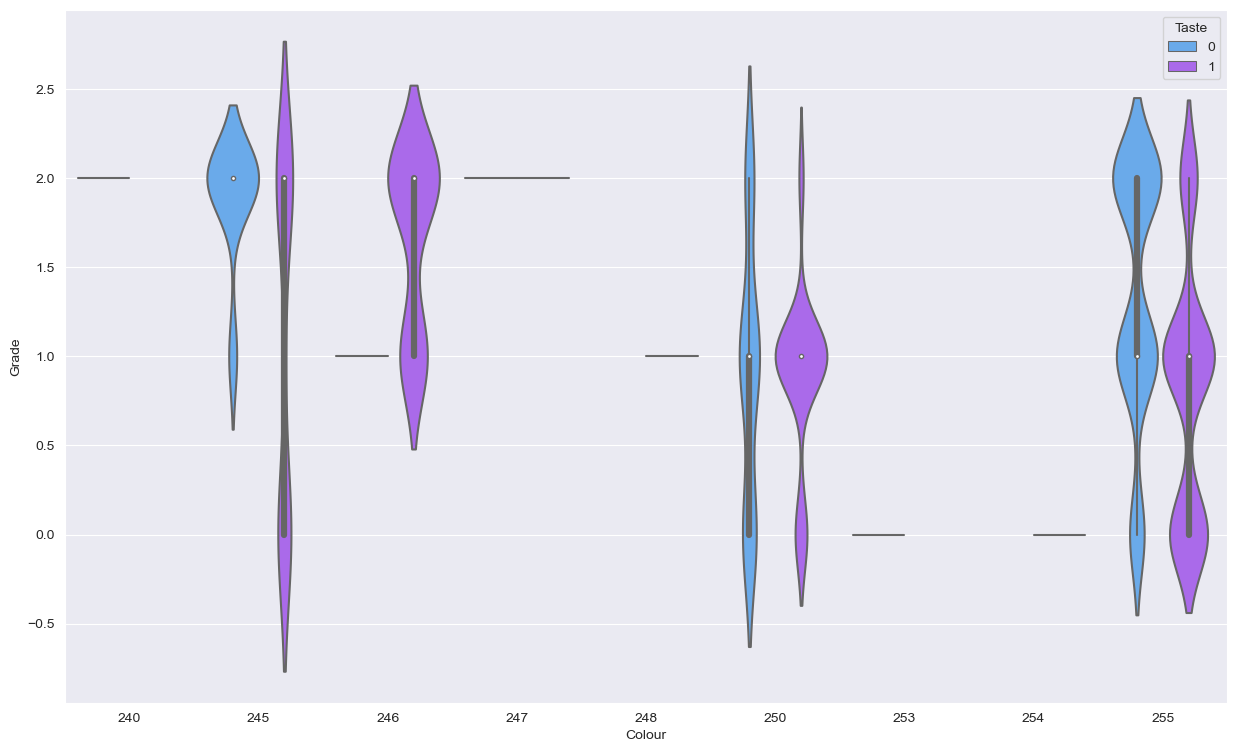

In [33]:
plt.figure(figsize=(15,9))
sns.violinplot(df['Colour'],df['Grade'],hue=df['Taste'],palette='cool')
plt.show()

Text(0.5, 1.0, 'Colour')

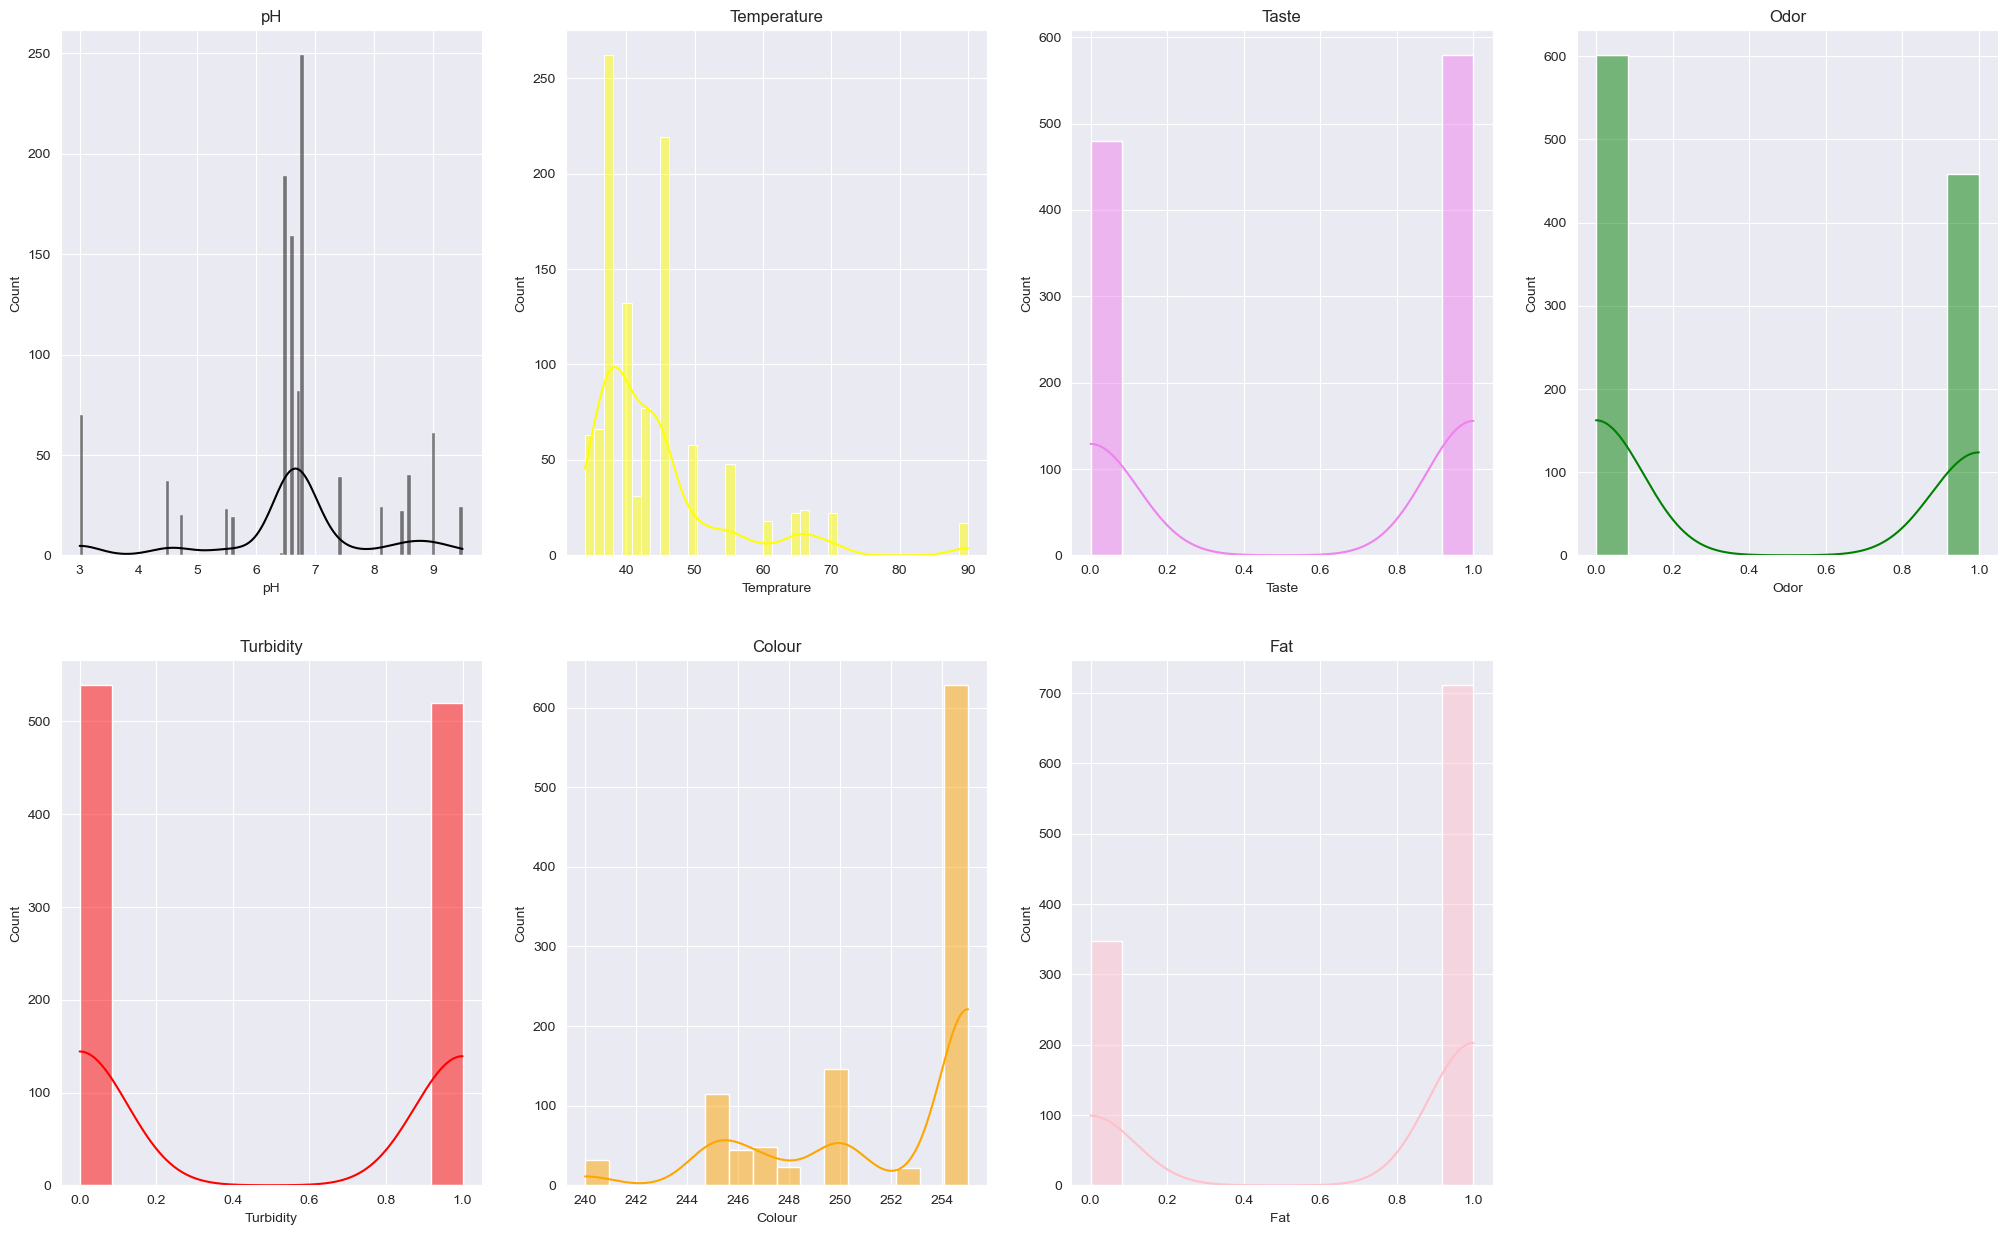

In [34]:
plt.figure(figsize=(25,15))

plt.subplot(2,4,1)
sns.histplot(df['pH'], color = 'black', kde = True).set_title('pH')

plt.subplot(2,4,2)
sns.histplot(df['Temprature'], kde = True, color = 'yellow').set_title('Temperature')

plt.subplot(2,4,3)
sns.histplot(df['Taste'], kde = True, color = 'violet').set_title('Taste')

plt.subplot(2,4,4)
sns.histplot(df['Odor'], kde = True, color = 'green').set_title('Odor')

plt.subplot(2,4,7)
sns.histplot(df['Fat '], kde = True, color = 'pink').set_title('Fat')

plt.subplot(2,4,5)
sns.histplot(df['Turbidity'], kde = True, color = 'red').set_title('Turbidity')

plt.subplot(2,4,6)
sns.histplot(df['Colour'], kde = True, color = 'orange').set_title('Colour')

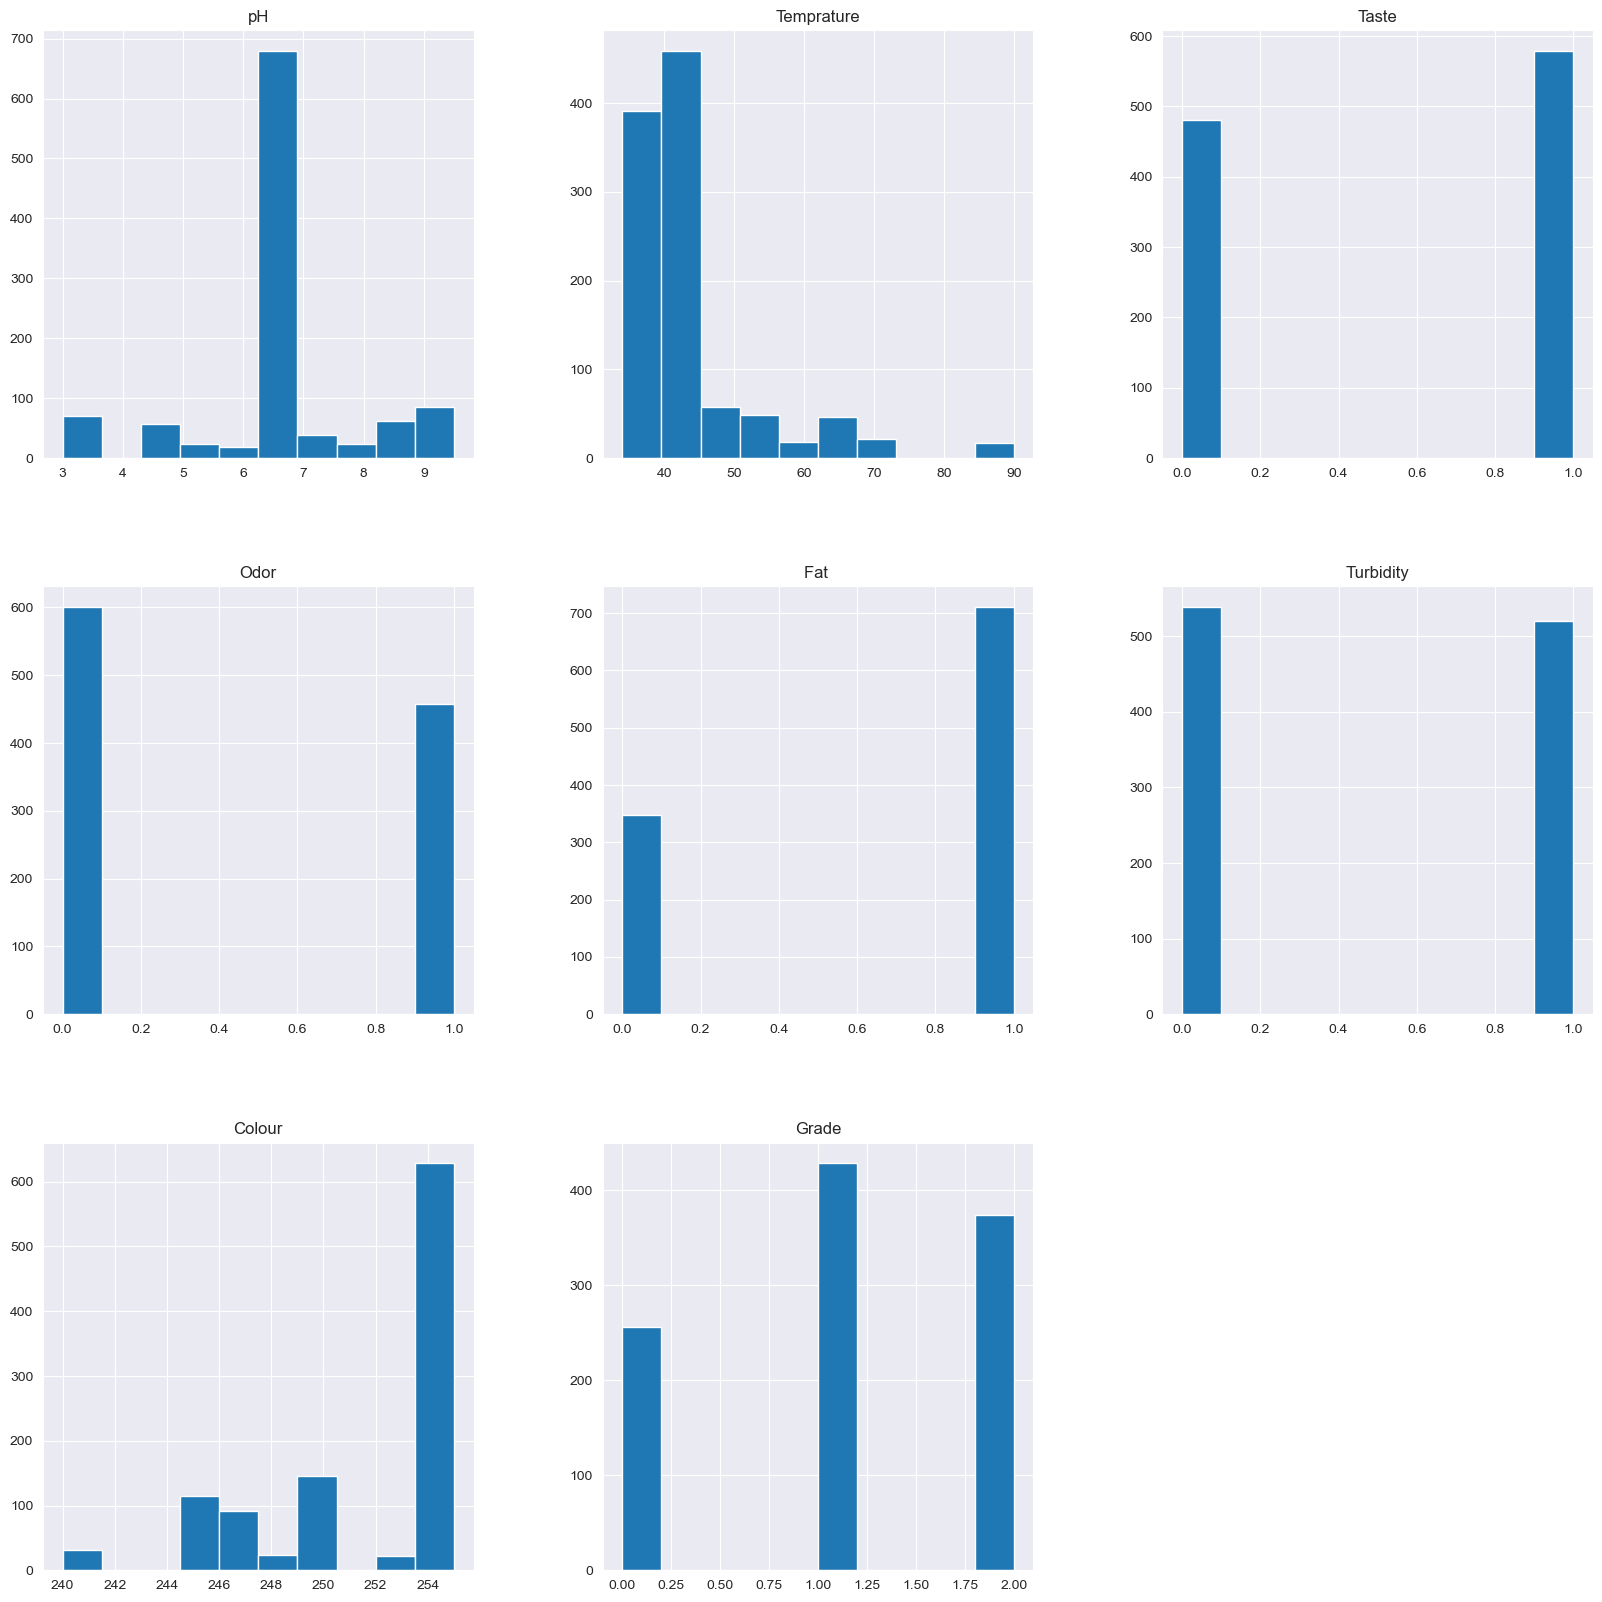

In [35]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='Grade', ylabel='Colour'>

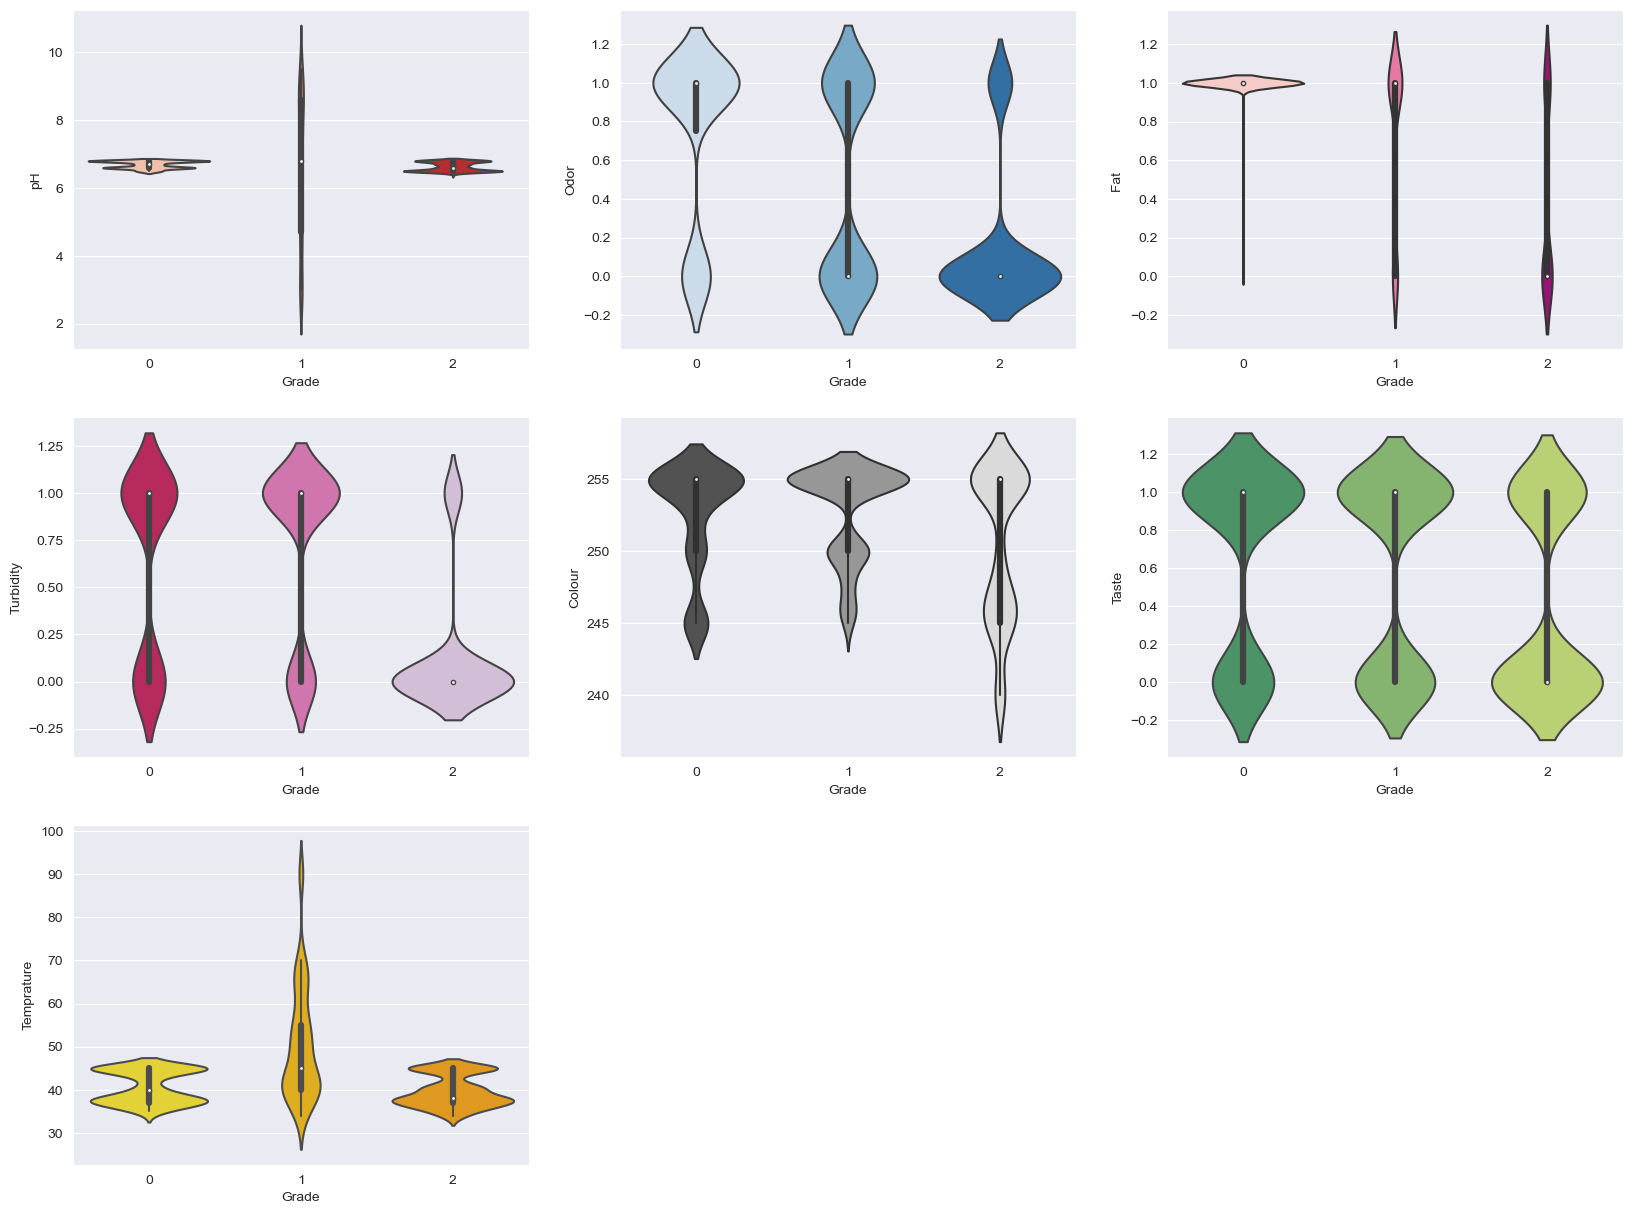

In [36]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.violinplot(x = 'Grade', y = 'pH', data = df, palette="Reds")

plt.subplot(3,3,7)
sns.violinplot(x = 'Grade', y = 'Temprature', data = df, palette="Wistia")

plt.subplot(3,3,6)
sns.violinplot(x = 'Grade', y = 'Taste', data = df, palette="summer")

plt.subplot(3,3,2)
sns.violinplot(x = 'Grade', y = 'Odor', data = df, palette="Blues")

plt.subplot(3,3,3)
sns.violinplot(x = 'Grade', y = 'Fat ', data = df, palette="RdPu")

plt.subplot(3,3,4)
sns.violinplot(x = 'Grade', y = 'Turbidity', data = df, palette="PuRd_r")

plt.subplot(3,3,5)
sns.violinplot(x = 'Grade', y = 'Colour', data = df, palette="Greys_r")

## We performing following operations
`Logestic Regression` 

`Decision Tree CLassifier` 

`Random Forest Classifier`

`KNeighbers Classifier`

## Data Preparation

In [37]:
X=df.drop('Grade',axis=1) #independent vaiables, Predictors

In [38]:
y=df.Grade #dependent variable, prediction done on this column

In [39]:
X

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [40]:
y

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int32

## Model Building

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [42]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255


In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [45]:
X_train_std

array([[-0.01298657, -0.73413845,  0.93338744, ...,  0.66666667,
         0.98792712,  0.72665791],
       [-0.01298657, -0.73413845,  0.93338744, ...,  0.66666667,
         0.98792712,  0.72665791],
       [-1.35738312, -0.63281668,  0.93338744, ...,  0.66666667,
        -1.01222041,  0.72665791],
       ...,
       [-0.08374428, -0.83546022, -1.07136646, ...,  0.66666667,
        -1.01222041,  0.72665791],
       [-0.01298657,  0.58304458, -1.07136646, ..., -1.5       ,
         0.98792712, -0.47043749],
       [ 0.12852886,  0.07643572,  0.93338744, ...,  0.66666667,
        -1.01222041, -1.66753288]])

In [46]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
5,6.6,37,1,1,1,1,255
310,6.6,37,1,1,1,1,255
557,4.7,38,1,0,1,0,255
104,5.6,50,0,1,1,1,255
97,6.5,37,0,0,0,0,255
...,...,...,...,...,...,...,...
330,9.0,43,1,0,1,1,250
466,6.7,45,1,1,1,0,245
121,6.5,36,0,0,1,0,255
1044,6.6,50,0,0,0,1,250


In [47]:
y_train.head()

5      0
310    0
557    1
104    1
97     2
Name: Grade, dtype: int32

In [48]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

## Logistic Regression

- Logistic regression is a popular statistical model used for binary classification problems,
where the dependent variable (also called the target or outcome variable)
takes on two possible values, typically represented as 0 and 1.
It is named after the logistic function used in the model.


- The logistic regression model estimates the probability of the dependent variable
belonging to a certain class based on one or more independent variables
(also known as predictors or features). The model uses a logistic or sigmoid function 
to transform the linear combination of the predictors into a probability value between 0 and 1.

In [49]:
#import Linear regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [50]:
lr.fit(X_train,y_train) #fitting the training and testing data

LogisticRegression()

In [51]:
print('Training accuracy score',lr.score(X_train,y_train)) #accuracy of training data
print("Testing accuracy Score",lr.score(X_test,y_test)) #accuracy of test data

Training accuracy score 0.7206477732793523
Testing accuracy Score 0.6981132075471698


## Confusion Matrix

- A `confusion matrix` is a table used to describe the performance of a classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions. It is a useful tool for evaluating the accuracy of a classification algorithm and understanding the types of errors it makes.


- The confusion matrix allows you to calculate various performance metrics, including `accuracy`,` precision`, `recall (sensitivity)`, `specificity`, and `F1 score`. 

In [52]:
from sklearn import metrics

In [53]:
confusion_matrix = metrics.confusion_matrix

In [54]:
y_pred=lr.predict(X_test)

In [55]:
cf_matrix=confusion_matrix(y_test,y_pred)

In [56]:
cf_matrix

array([[ 28,  26,  22],
       [ 17,  84,  14],
       [  5,  12, 110]], dtype=int64)

<AxesSubplot:>

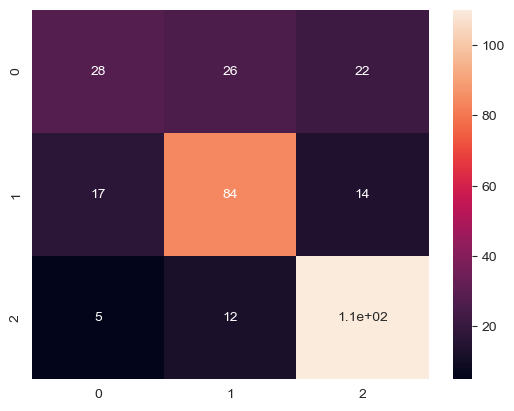

In [57]:
sns.heatmap(cf_matrix,annot=True)

## Classifiaction Report

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.37      0.44        76
           1       0.69      0.73      0.71       115
           2       0.75      0.87      0.81       127

    accuracy                           0.70       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.68      0.70      0.68       318



## Prediction

In [60]:
print(y_pred)

[1 1 1 1 2 1 2 1 0 2 1 2 2 2 1 2 1 2 2 2 0 2 2 2 2 2 1 0 2 1 2 2 0 2 1 2 2
 1 2 2 1 1 0 2 0 0 2 2 2 2 2 1 0 2 2 1 2 1 2 2 2 0 1 0 1 0 2 1 1 1 1 1 1 2
 1 2 2 2 1 1 2 2 1 0 2 2 0 1 2 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 2 2 1 1 2 1 1
 2 2 1 0 1 2 1 0 0 2 1 1 1 2 1 2 2 0 2 2 2 1 2 1 0 2 2 2 2 2 1 1 2 1 1 2 1
 1 2 2 2 2 1 2 0 1 0 1 1 2 2 2 1 2 1 1 1 2 2 0 2 1 1 2 1 2 2 2 1 1 2 0 1 0
 2 2 0 2 1 1 2 0 1 1 1 1 1 2 2 0 2 0 0 2 1 1 0 1 2 0 1 2 1 0 1 1 0 2 1 2 2
 2 2 1 2 2 0 2 0 2 0 2 0 2 1 2 2 2 2 1 1 1 1 1 2 1 2 0 1 1 0 2 0 2 2 1 2 1
 0 2 0 2 0 2 1 0 2 2 2 2 2 1 2 2 1 1 1 2 1 2 0 1 2 1 1 1 2 1 2 1 1 2 0 2 1
 0 0 2 2 2 0 1 2 1 1 1 0 2 2 2 2 2 2 2 1 1 2]


## Decision Tree Classifier

- Two criterion is there in this
- nut we using only one i.e.criterion entropy

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [62]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [63]:
print("Training accuracy sciore",dtc.score(X_train,y_train))
print("testing Accuracy score",dtc.score(X_test,y_test))

Training accuracy sciore 0.7557354925775979
testing Accuracy score 0.7547169811320755


## Confusion Matrix

In [64]:
y_pred=dtc.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  0,   0,  76],
       [  0, 113,   2],
       [  0,   0, 127]], dtype=int64)

<AxesSubplot:>

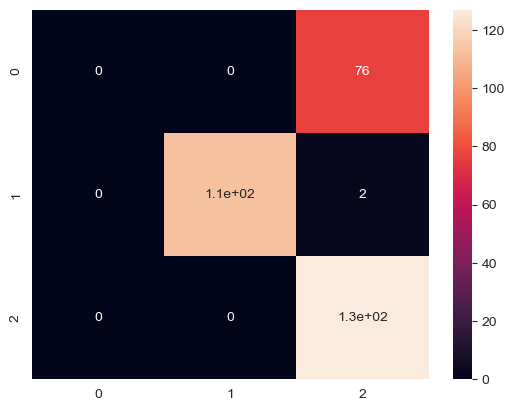

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Classification Report

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.98      0.99       115
           2       0.62      1.00      0.77       127

    accuracy                           0.75       318
   macro avg       0.54      0.66      0.59       318
weighted avg       0.61      0.75      0.66       318



## Visualization Of Decision Tree

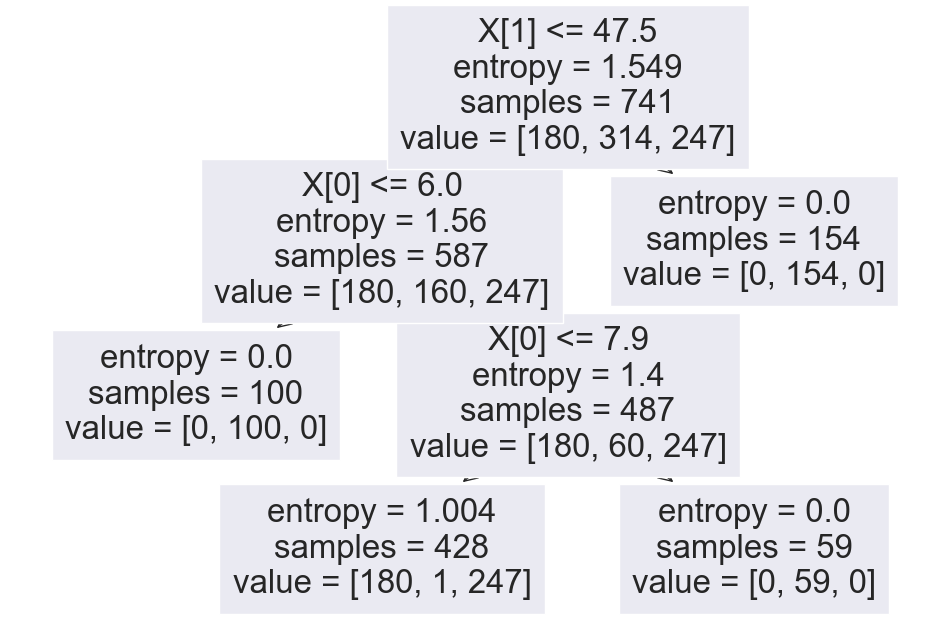

In [67]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dtc.fit(X_train,y_train))
plt.show()

## Random Forest
- `Random Forest` is a popular machine learning algorithm used for both regression and classification tasks. It is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree is built on a randomly sampled subset of the data and features, hence the name `random forest`.

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
print("training accuracy score",rfc.score(X_train,y_train))
print("testing accuracy score",rfc.score(X_test,y_test))

training accuracy score 1.0
testing accuracy score 0.9968553459119497


In [71]:
y_pred=rfc.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
print("model accuracy score with 100 decision trees:{0:0.4f}".format(accuracy_score(y_test,y_pred)))

model accuracy score with 100 decision trees:0.9969


### Random Forest with n_estimatos =100

In [73]:
rfc_100=RandomForestClassifier(n_estimators=100)

In [74]:
rfc_100.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
rfc_100_pred=rfc.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
print("model accuracy score with 100 decision trees:{0:0.4f}".format(accuracy_score(y_test,rfc_100_pred)))

model accuracy score with 100 decision trees:0.9969


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       115
           2       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [78]:
print(classification_report(y_test,rfc_100_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.99      1.00       115
           2       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [79]:
confusion_matrix(y_test,y_pred)

array([[ 76,   0,   0],
       [  1, 114,   0],
       [  0,   0, 127]], dtype=int64)

In [90]:
print(rfc.predict(X_test))

[0 1 1 2 2 1 1 0 1 2 1 2 0 2 1 1 0 2 2 2 1 2 0 2 2 2 0 0 1 1 2 0 0 2 0 2 2
 0 2 2 1 1 1 2 0 1 0 0 2 0 2 1 1 2 2 1 0 1 1 2 2 1 0 0 0 1 2 2 1 2 1 1 0 2
 1 1 1 2 1 2 2 2 0 0 2 2 2 1 2 0 1 1 0 2 1 2 0 0 1 0 1 1 1 1 2 2 1 1 2 0 0
 2 2 1 0 1 2 1 1 0 2 1 1 1 2 0 2 2 0 2 1 2 1 2 1 1 2 1 2 2 2 0 1 2 1 1 0 1
 1 2 2 2 2 1 2 1 1 0 1 0 2 2 2 1 2 0 1 1 2 1 2 0 1 1 0 1 2 2 2 2 1 2 0 1 0
 1 2 0 2 1 1 2 2 1 0 1 1 0 2 2 2 2 0 0 2 1 2 2 2 2 0 0 2 2 0 1 1 0 2 1 2 2
 0 0 1 0 1 1 2 0 0 1 2 1 2 1 2 1 2 1 1 0 0 1 1 0 1 2 1 1 1 0 2 0 2 2 1 2 1
 1 2 0 0 0 2 1 0 0 2 2 2 2 1 0 2 1 1 1 2 0 2 0 2 0 1 1 1 2 0 2 1 1 2 0 2 2
 0 0 2 1 2 1 0 2 1 1 1 0 2 2 2 2 2 2 2 2 1 0]


## KNeighbersClassifiers

- The k-Nearest Neighbors (k-NN) algorithm is a simple yet effective classification algorithm that predicts the class of a new sample based on its similarity to the k nearest neighbors in the training dataset. It is a non-parametric and lazy learning algorithm, meaning it doesn't make any assumptions about the underlying data distribution and doesn't explicitly build a model during the training phase.

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
print("training Accuracy score",knn.score(X_train,y_train))
print("testinhg accuracy score",knn.score(X_test,y_test))

training Accuracy score 0.9919028340080972
testinhg accuracy score 0.9874213836477987


In [83]:
knn_pred=knn.predict(X_test)
print("accuracy score",accuracy_score(y_test,knn_pred))

accuracy score 0.9874213836477987


In [84]:
confusion_matrix(y_test,knn_pred)

array([[ 76,   0,   0],
       [  0, 113,   2],
       [  2,   0, 125]], dtype=int64)

In [85]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.98      0.99       115
           2       0.98      0.98      0.98       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



<AxesSubplot:>

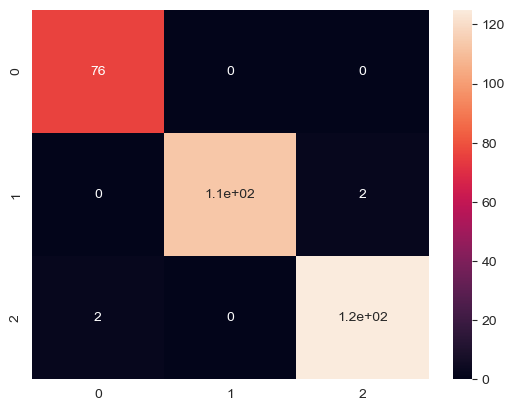

In [86]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

In [87]:
print(dtc.predict(X_test))

[2 1 1 2 2 1 1 2 1 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 1 1 1 2 2 1 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2
 1 1 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 1 2 1 1 1 1 2 2 1 1 2 2 2
 2 2 1 2 1 2 1 2 2 2 1 1 1 2 2 2 2 2 2 1 2 1 2 1 1 2 1 2 2 2 2 1 2 1 1 2 1
 1 2 2 2 2 1 2 1 1 2 1 2 2 2 2 1 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2 1 2
 1 2 2 2 1 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2
 2 2 1 2 1 1 2 2 2 1 2 1 2 1 2 1 2 1 1 2 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2 1
 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2 1 1 1 2 2 2 1 1 2 2 2 2
 2 2 2 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2]
